In [1]:
import pandas as pd
import requests
import json
import numpy as np
from datetime import datetime, date

In [2]:
url = "https://eservices.mas.gov.sg/api/action/datastore/search.json?resource_id=9150e6cb-9c13-44b3-9a4f-1b21e991143c&limit=1000"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
print(response.text)

{"success":true,"result":{"resource_id":["9150e6cb-9c13-44b3-9a4f-1b21e991143c"],"limit":1000,"total":"354","records":[{"end_of_month":"1991-01","preliminary":"0","assets_total":"43113.5","assets_foreign_notes_coins":"43.3","assets_adfb":"35855.3","assets_lnbc":"4557.1","assets_bills":"1571.8","assets_sae":"342.4","assets_other_foreign":"743.6","liab_total":"41538.2","liab_dnbc":"5749.0","liab_adtb":"36154.2","liab_bills":"61.1","liab_other_foreign":"-426.1","net_foreign_assets_liab":"1575.3","timestamp":"1596759755"},{"end_of_month":"1991-02","preliminary":"0","assets_total":"44790.5","assets_foreign_notes_coins":"35.0","assets_adfb":"37944.5","assets_lnbc":"4475.5","assets_bills":"1279.6","assets_sae":"345.1","assets_other_foreign":"710.8","liab_total":"41813.1","liab_dnbc":"5771.7","liab_adtb":"36335.9","liab_bills":"70.2","liab_other_foreign":"-364.7","net_foreign_assets_liab":"2977.4","timestamp":"1596759755"},{"end_of_month":"1991-03","preliminary":"0","assets_total":"45841.3","a

In [6]:
response.headers

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Content-Type': 'application/json; charset=utf-8', 'Expires': '-1', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'Generic', 'Access-Control-Allow-Origin': '*', 'Content-Length': '146348', 'Date': 'Thu, 06 Aug 2020 16:22:35 GMT', 'Connection': 'keep-alive', 'Set-Cookie': 'MAScookie=!mv9M+CGHJuG8YfOsmaGRUExspuQYhbHhPvNmxHGSTMVeSPMxBRr0QodZ21SyXq+0TfXJDaPyWqTWlikdjlod3PMVaCb9ryPKPV0viKguTPKYYJ0IAM7f/RvVUjNhSGcnu4oEn89SJWEu0L1c9G0bO8Y1qIryVWM=;HttpOnly;Secure;Path=/;Version=1;, TS011284b5=01df21a10ac6cf9dc42ca037535cdee57916281fa2483ececcd93d91ea74702b068e7b992d6f84c5d9742013d57a4ad3bf6ee1c391; Path=/; Secure; HTTPOnly', 'Strict-Transport-Security': 'max-age=31536000 ; includeSubDomains ; preload'}

In [7]:
res_json = response.json()

In [8]:
res_json

{'success': True,
 'result': {'resource_id': ['9150e6cb-9c13-44b3-9a4f-1b21e991143c'],
  'limit': 1000,
  'total': '354',
  'records': [{'end_of_month': '1991-01',
    'preliminary': '0',
    'assets_total': '43113.5',
    'assets_foreign_notes_coins': '43.3',
    'assets_adfb': '35855.3',
    'assets_lnbc': '4557.1',
    'assets_bills': '1571.8',
    'assets_sae': '342.4',
    'assets_other_foreign': '743.6',
    'liab_total': '41538.2',
    'liab_dnbc': '5749.0',
    'liab_adtb': '36154.2',
    'liab_bills': '61.1',
    'liab_other_foreign': '-426.1',
    'net_foreign_assets_liab': '1575.3',
    'timestamp': '1596759755'},
   {'end_of_month': '1991-02',
    'preliminary': '0',
    'assets_total': '44790.5',
    'assets_foreign_notes_coins': '35.0',
    'assets_adfb': '37944.5',
    'assets_lnbc': '4475.5',
    'assets_bills': '1279.6',
    'assets_sae': '345.1',
    'assets_other_foreign': '710.8',
    'liab_total': '41813.1',
    'liab_dnbc': '5771.7',
    'liab_adtb': '36335.9',
  

In [9]:
res_json.keys()

dict_keys(['success', 'result'])

In [10]:
res_json.values()

dict_values([True, {'resource_id': ['9150e6cb-9c13-44b3-9a4f-1b21e991143c'], 'limit': 1000, 'total': '354', 'records': [{'end_of_month': '1991-01', 'preliminary': '0', 'assets_total': '43113.5', 'assets_foreign_notes_coins': '43.3', 'assets_adfb': '35855.3', 'assets_lnbc': '4557.1', 'assets_bills': '1571.8', 'assets_sae': '342.4', 'assets_other_foreign': '743.6', 'liab_total': '41538.2', 'liab_dnbc': '5749.0', 'liab_adtb': '36154.2', 'liab_bills': '61.1', 'liab_other_foreign': '-426.1', 'net_foreign_assets_liab': '1575.3', 'timestamp': '1596759755'}, {'end_of_month': '1991-02', 'preliminary': '0', 'assets_total': '44790.5', 'assets_foreign_notes_coins': '35.0', 'assets_adfb': '37944.5', 'assets_lnbc': '4475.5', 'assets_bills': '1279.6', 'assets_sae': '345.1', 'assets_other_foreign': '710.8', 'liab_total': '41813.1', 'liab_dnbc': '5771.7', 'liab_adtb': '36335.9', 'liab_bills': '70.2', 'liab_other_foreign': '-364.7', 'net_foreign_assets_liab': '2977.4', 'timestamp': '1596759755'}, {'end_

In [11]:
temp_data = res_json['result']

In [12]:
temp_data.keys()

dict_keys(['resource_id', 'limit', 'total', 'records'])

In [13]:
# extract the records
data = temp_data['records']

In [14]:
type(data)

list

In [15]:
data

[{'end_of_month': '1991-01',
  'preliminary': '0',
  'assets_total': '43113.5',
  'assets_foreign_notes_coins': '43.3',
  'assets_adfb': '35855.3',
  'assets_lnbc': '4557.1',
  'assets_bills': '1571.8',
  'assets_sae': '342.4',
  'assets_other_foreign': '743.6',
  'liab_total': '41538.2',
  'liab_dnbc': '5749.0',
  'liab_adtb': '36154.2',
  'liab_bills': '61.1',
  'liab_other_foreign': '-426.1',
  'net_foreign_assets_liab': '1575.3',
  'timestamp': '1596759755'},
 {'end_of_month': '1991-02',
  'preliminary': '0',
  'assets_total': '44790.5',
  'assets_foreign_notes_coins': '35.0',
  'assets_adfb': '37944.5',
  'assets_lnbc': '4475.5',
  'assets_bills': '1279.6',
  'assets_sae': '345.1',
  'assets_other_foreign': '710.8',
  'liab_total': '41813.1',
  'liab_dnbc': '5771.7',
  'liab_adtb': '36335.9',
  'liab_bills': '70.2',
  'liab_other_foreign': '-364.7',
  'net_foreign_assets_liab': '2977.4',
  'timestamp': '1596759755'},
 {'end_of_month': '1991-03',
  'preliminary': '0',
  'assets_tot

In [16]:
# Save the data as json file in the pc drive
with open('MAS_EOM_BALANCES.JSON', 'w') as jsonfile:
    json.dump(data, jsonfile)

In [17]:
with open('MAS_EOM_BALANCES.JSON', 'r') as jsonfile:
    eom_data = json.load(jsonfile)

In [18]:
eom_data

[{'end_of_month': '1991-01',
  'preliminary': '0',
  'assets_total': '43113.5',
  'assets_foreign_notes_coins': '43.3',
  'assets_adfb': '35855.3',
  'assets_lnbc': '4557.1',
  'assets_bills': '1571.8',
  'assets_sae': '342.4',
  'assets_other_foreign': '743.6',
  'liab_total': '41538.2',
  'liab_dnbc': '5749.0',
  'liab_adtb': '36154.2',
  'liab_bills': '61.1',
  'liab_other_foreign': '-426.1',
  'net_foreign_assets_liab': '1575.3',
  'timestamp': '1596759755'},
 {'end_of_month': '1991-02',
  'preliminary': '0',
  'assets_total': '44790.5',
  'assets_foreign_notes_coins': '35.0',
  'assets_adfb': '37944.5',
  'assets_lnbc': '4475.5',
  'assets_bills': '1279.6',
  'assets_sae': '345.1',
  'assets_other_foreign': '710.8',
  'liab_total': '41813.1',
  'liab_dnbc': '5771.7',
  'liab_adtb': '36335.9',
  'liab_bills': '70.2',
  'liab_other_foreign': '-364.7',
  'net_foreign_assets_liab': '2977.4',
  'timestamp': '1596759755'},
 {'end_of_month': '1991-03',
  'preliminary': '0',
  'assets_tot

In [19]:
yr_mth = []

from datetime import datetime, date

for i in range(len(eom_data)) :
    temp = datetime.strptime(eom_data[i]['end_of_month'], '%Y-%m')
    yr_mth.append(temp)



In [20]:
print(yr_mth[0:5])

[datetime.datetime(1991, 1, 1, 0, 0), datetime.datetime(1991, 2, 1, 0, 0), datetime.datetime(1991, 3, 1, 0, 0), datetime.datetime(1991, 4, 1, 0, 0), datetime.datetime(1991, 5, 1, 0, 0)]


In [21]:
non_bank_cust_loans = []

for i in range(len(eom_data)) :
    temp = float(eom_data[i]['assets_lnbc'])
    non_bank_cust_loans.append(temp)



In [22]:
print(len(non_bank_cust_loans))
print(non_bank_cust_loans[0:6])    

354
[4557.1, 4475.5, 4564.4, 4517.3, 4490.8, 4415.4]


In [23]:
non_bank_cust_deposits = []

for i in range(len(eom_data)) :
    temp = float(eom_data[i]['liab_dnbc'])
    non_bank_cust_deposits.append(temp)


In [24]:
print(len(non_bank_cust_deposits))
print(non_bank_cust_deposits[0:6]) 

354
[5749.0, 5771.7, 5633.3, 5713.6, 5792.7, 5595.5]


In [25]:

import pandas as pd
eom_cust_bal =[]
eom_cust_bal = pd.DataFrame(yr_mth, columns=['Period'])

In [26]:
eom_cust_bal['Loans'] = non_bank_cust_loans

In [27]:
eom_cust_bal['Deposits'] = non_bank_cust_deposits

In [28]:
eom_cust_bal.dtypes

Period      datetime64[ns]
Loans              float64
Deposits           float64
dtype: object

In [29]:
eom_AFC = eom_cust_bal[(eom_cust_bal["Period"] >= '1996-01-01') & (eom_cust_bal["Period"] < '2000-01-01')]

In [30]:
eom_GFC = eom_cust_bal[(eom_cust_bal["Period"] >= '2006-01-01') & (eom_cust_bal["Period"] < '2010-01-01')]

In [31]:
eom_Covid = eom_cust_bal[(eom_cust_bal["Period"] >= '2019-01-01') & (eom_cust_bal["Period"] < '2021-12-01')]

In [32]:
import matplotlib.pyplot as plt

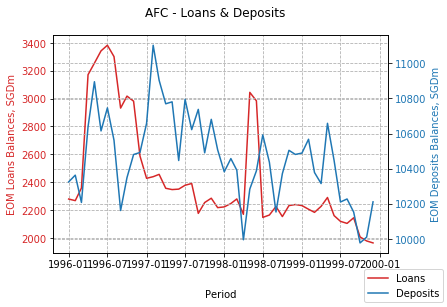

In [33]:
# AFC (1997-1998)
x = eom_AFC['Period']
y = eom_AFC['Loans']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('EOM Loans Balances, SGD''m', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which='major', axis='both', linestyle='--')
ax1.xaxis.labelpad = 20

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

z = eom_AFC['Deposits']
color = 'tab:blue'
ax2.set_xlabel('Period')
ax2.set_ylabel('EOM Deposits Balances, SGD''m', color=color)
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(which='major', axis='both', linestyle='--')
ax2.xaxis.labelpad = 20

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('AFC - Loans & Deposits', fontsize=12)
fig.legend(labels = ('Loans','Deposits'),loc='lower right')
plt.show()

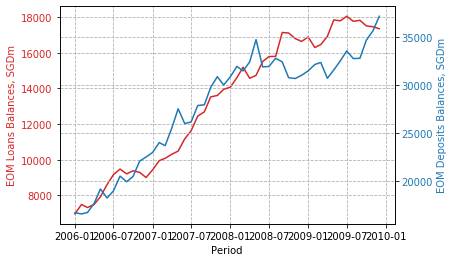

In [34]:
# GFC (2007-2008)
x = eom_GFC['Period']
y = eom_GFC['Loans']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('EOM Loans Balances, SGD''m', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which='major', axis='both', linestyle='--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

z = eom_GFC['Deposits']
color = 'tab:blue'
ax2.set_xlabel('Period')
ax2.set_ylabel('EOM Deposits Balances, SGD''m', color=color)
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(which='major', axis='both', linestyle='--')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

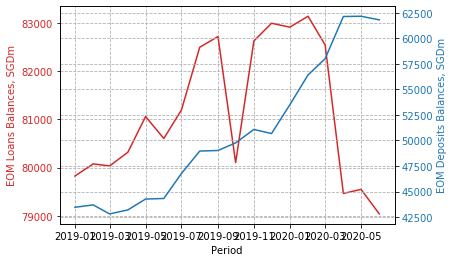

In [35]:
# Covid (2020 ...)
x = eom_Covid['Period']
y = eom_Covid['Loans']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Period')
ax1.set_ylabel('EOM Loans Balances, SGD''m', color=color)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which='major', axis='both', linestyle='--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

z = eom_Covid['Deposits']
color = 'tab:blue'
ax2.set_xlabel('Period')
ax2.set_ylabel('EOM Deposits Balances, SGD''m', color=color)
ax2.plot(x, z, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(which='major', axis='both', linestyle='--')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [36]:
eom_Covid

,Period,Loans,Deposits
336,2019-01-01,79822.6,43457.0
337,2019-02-01,80075.3,43690.9
338,2019-03-01,80032.5,42808.1
339,2019-04-01,80317.7,43201.6
340,2019-05-01,81056.2,44262.7
341,2019-06-01,80602.0,44320.6
342,2019-07-01,81194.6,46772.0
343,2019-08-01,82494.0,48962.2
344,2019-09-01,82715.8,49019.7
345,2019-10-01,80101.5,49764.3


In [37]:
eom_AFC

,Period,Loans,Deposits
60,1996-01-01,2278.9,10324.8
61,1996-02-01,2267.5,10363.3
62,1996-03-01,2358.0,10207.8
63,1996-04-01,3171.8,10638.3
64,1996-05-01,3254.8,10894.9
65,1996-06-01,3342.9,10614.9
66,1996-07-01,3383.4,10746.2
67,1996-08-01,3301.8,10561.9
68,1996-09-01,2932.1,10162.0
69,1996-10-01,3018.1,10349.3


In [38]:
eom_GFC

,Period,Loans,Deposits
180,2006-01-01,6967.0,16661.1
181,2006-02-01,7498.9,16535.9
182,2006-03-01,7325.0,16686.2
183,2006-04-01,7495.3,17619.0
184,2006-05-01,7929.4,19139.4
185,2006-06-01,8612.3,18201.4
186,2006-07-01,9165.8,18937.3
187,2006-08-01,9479.4,20482.0
188,2006-09-01,9210.0,19893.3
189,2006-10-01,9382.0,20441.2
